In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Data Visualization

<AxesSubplot:xlabel='sex', ylabel='count'>

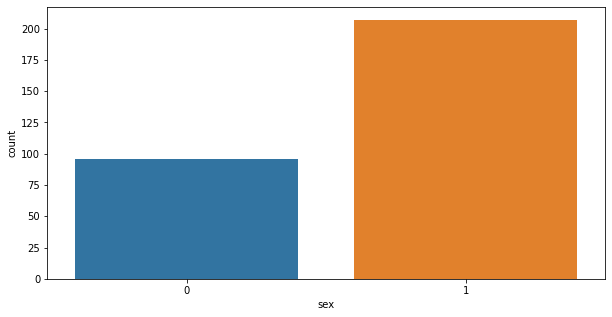

In [5]:
# Value counts of age column
plt.figure(figsize = (10, 5))
sns.countplot(x = 'sex', data = df)

<Figure size 720x720 with 0 Axes>

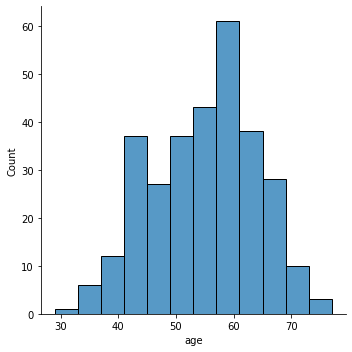

In [6]:
# Distibution of age column
plt.figure(figsize = (10, 10))
sns.displot(df['age'])

<AxesSubplot:>

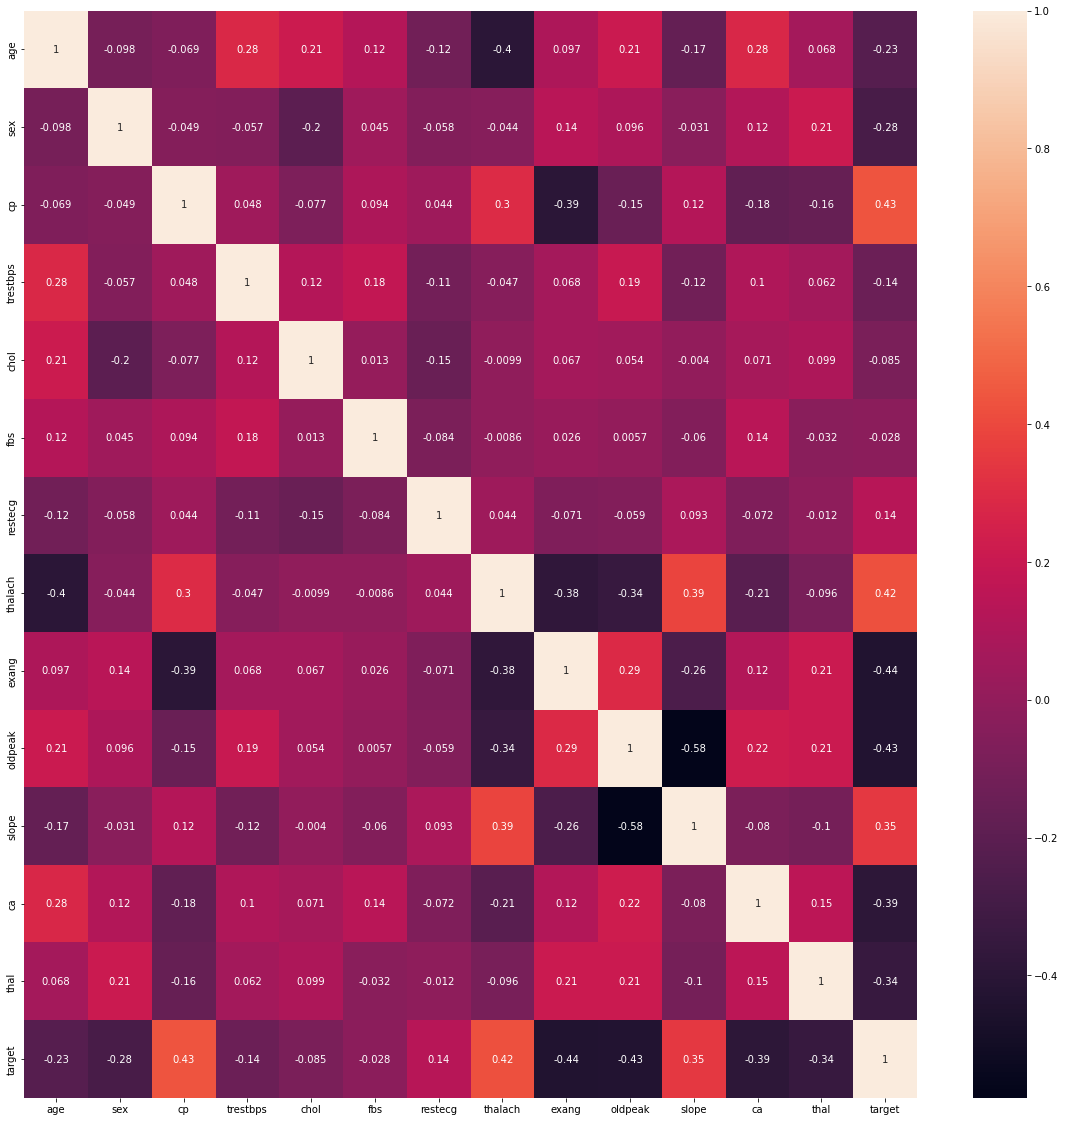

In [7]:
# Corelation of features
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)

C:\Users\91773\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91773\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91773\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


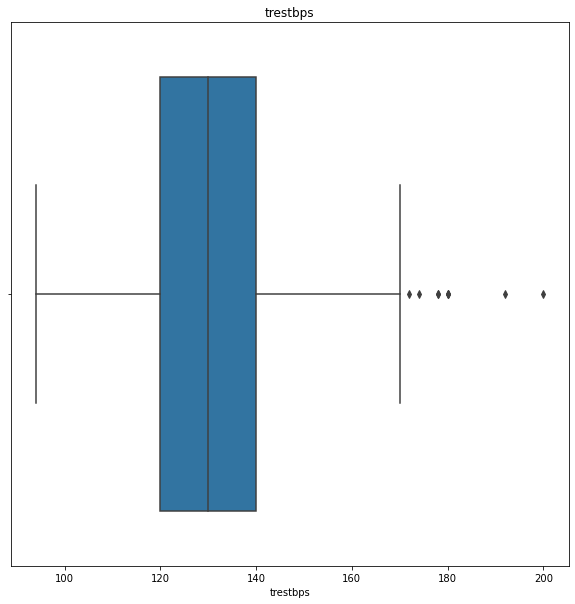

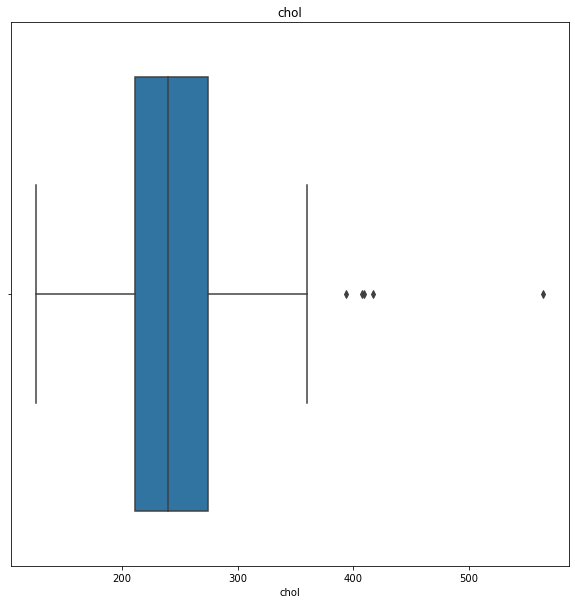

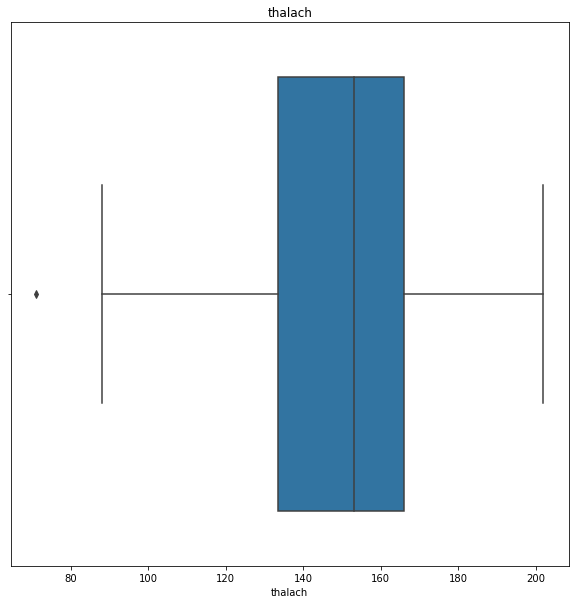

In [8]:
# Checking for outliers
for f in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize = (10, 10))
    sns.boxplot(df[f])
    plt.title(f)

<Figure size 720x720 with 0 Axes>

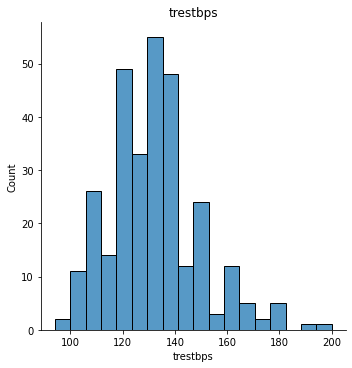

<Figure size 720x720 with 0 Axes>

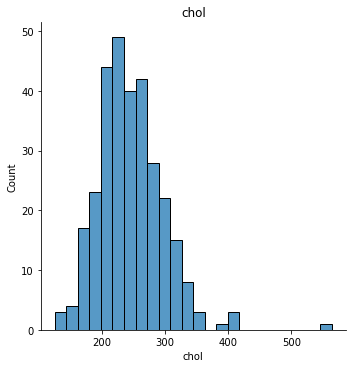

<Figure size 720x720 with 0 Axes>

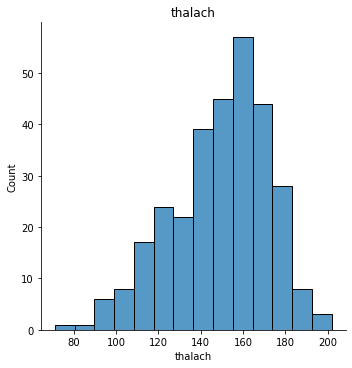

In [9]:
for f in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize=(10, 10))
    sns.displot(df[f])
    plt.title(f)

In [10]:
# Defining the function to remove outliers
def remove_outliers(df, feature):
    lower_bound = df[feature].mean() - (3 * df[feature].std())
    upper_bound = df[feature].mean() + (3 * df[feature].std())
    
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound

In [11]:
for f in ['trestbps', 'chol', 'thalach', 'age']:
    remove_outliers(df, f)

C:\Users\91773\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91773\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91773\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


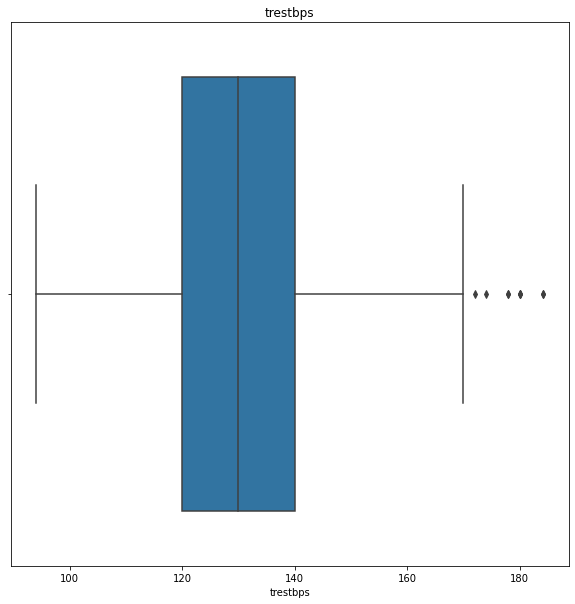

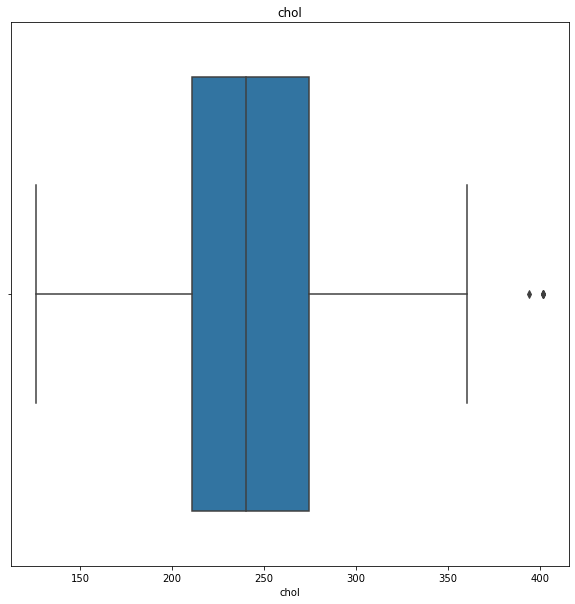

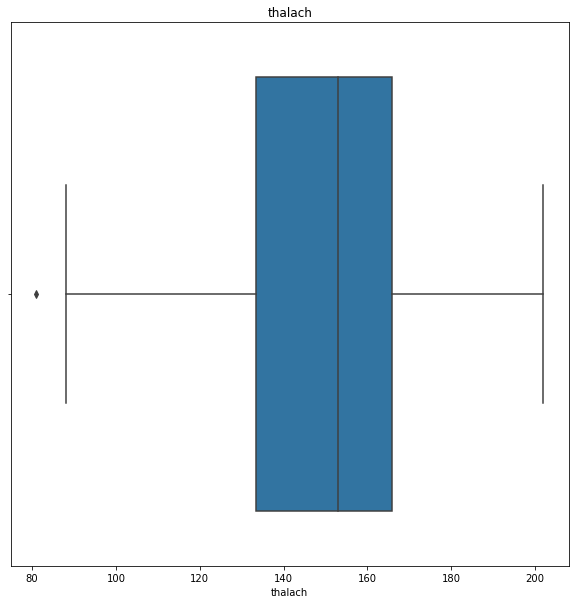

In [12]:
for f in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize=(10, 10))
    sns.boxplot(df[f])
    plt.title(f)

In [13]:
remove_outliers(df, 'age')

In [14]:
## dependent and independent features

X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

## converting X and y into numpy array's

X = X.values
Y = Y.values

In [15]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [16]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

In [17]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [18]:
lr.fit(X_train, Y_train)

LinearRegression()

In [19]:
predictions = lr.predict(X_test)

In [20]:
pd.DataFrame({'Acutual': Y_test, 'Predicted': predictions})

,Acutual,Predicted
0,1,1.061020
1,0,0.243236
2,0,-0.000183
3,0,-0.152226
4,1,0.950703
...,...,...
71,0,0.079319
72,1,0.735529
73,0,-0.126548
74,1,0.715725


In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(accuracy_score(Y_test, predictions))

print(classification_report(Y_test, predictions))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True);

ValueError: Classification metrics can't handle a mix of binary and continuous targets